In [5]:
# Libraries
from __future__ import division
import numpy as np
from random import randint


In [122]:
# Helper Functions
#
#
# Function: golden_search
#
# Required Parameters:
# 1. x, a list containing a scalar in each dimension, x1, x2, ... , xN 
# 2. d, a list containing a direction in each dimension, d1, d2, ... , dN
#
# Optional Parameters:
# 1. low, a point to lower bound the initial golden search
# 2. high, a point to upper bound the initial golden search
# 3. alpha, the golden ratio number
# 4. verbose, to echo each steps progress
def golden_search(x, d, low=0, high=1, eps=0.1, alpha = 0.618, verbose=False):

    # min w = (x^2+y^2 + x*y) + (y^2+z^2 + y*z) + (x^2+z^2 + x*z)
    def flambda(l):
        return ((x[0]-l*d[0])**2+(x[1]-l*d[1])**2 + (x[0]-l*d[0])*(x[1]-l*d[1]) + 
               (x[1]-l*d[1])**2+(x[2]-l*d[2])**2 + (x[1]-l*d[1])*(x[2]-l*d[2]) + 
               (x[0]-l*d[0])**2+(x[2]-l*d[2])**2 + (x[0]-l*d[0])*(x[2]-l*d[2]))

    
    if verbose:
        print("*******************************")
        print("Executing Golden Ratio Search")
        print("*******************************")

    # Define Constants
    k=0
    
    # Create lists
    lam=list()
    mu=list()
    a=list()
    b=list()
    distances=list()
    
    # Step 1
    a.append(low)
    b.append(high)

    lam0 = a[k] + (1-alpha)*(b[k]-a[k])
    mu0 = a[k] + alpha*(b[k]-a[k])
    
    lam.append(lam0)
    mu.append(mu0)
    
    if verbose:
        print("************************")
        print(("[a,b]"), "|b[k]-a[k]|")
        print("************************")
        
    while True:
        distances.append(abs(b[k]-a[k])) 
        if verbose:
            print(a[k],b[k], distances[k])

        if(distances[k] < eps): # optimal soln lies within [a,b]
            break
        elif flambda(lam[k]) > flambda(mu[k]):
            # Step 2
            a.append(lam[k])
            b.append(b[k])
            lam.append(mu[k])
            mu.append(a[k+1] + alpha*(b[k+1]-a[k+1]))
        elif flambda(lam[k]) <= flambda(mu[k]):
            # Step3
            a.append(a[k])
            b.append(mu[k])
            mu.append(lam[k])
            lam.append(a[k+1]+(1-alpha)*(b[k+1]-a[k+1]))
        else:
            print("Something went wrong.")

        k += 1
    
    #return random.uniform(a[-1], b[-1])
    return (a[-1]+b[-1])/2


In [119]:
# Conjugate Gradient Method of Fletcher and Reeves p. 423
# min w = (x^2+y^2 + x*y) + (y^2+z^2 + y*z) + (x^2+z^2 + x*z)
# 4d Hyperbowl, a bowl in each dimension
f = lambda x,y,z: (x**2+y**2 + x*y) + (y**2+z**2 + y*z) + (x**2+z**2 + x*y)
fgradient = lambda x,y,z: np.array([4*x + y + z,
                                    4*y + x + z,
                                    4*z + x + y])

get_alpha = lambda ynext, ynow: (np.linalg.norm(ynext)**2) / (np.linalg.norm(ynow)**2)

def printer(index):
    print("X:",xList[index], "D:",dList[index], "Z:",zList[index], "l:",lList[index], "a:",aList[index])
    
    
    
results = [] # starting point, final soln

for i in range(10):
    # Initialization Step
    xList=[]
    dList=[]
    zList=[]
    aList=[]
    lList=[]
    eps=0.01

    x1=randint(-100, 100)
    x2=randint(-100, 100)
    x3=randint(-100, 100)
    d1=fgradient(x1,x2,x3)[0]
    d2=fgradient(x1,x2,x3)[1]
    d3=fgradient(x1,x2,x3)[2]
    z=f(x1,x2,x3)

    xList.append((x1,x2,x3))
    dList.append((d1,d2,d3))
    zList.append(z)
    aList.append("nil")
    lList.append("nil")

    j=0
    while np.linalg.norm(fgradient(x1,x2,x3)) >= eps:

        printer(-1)

        lambd= golden_search(xList[-1], dList[-1],verbose=False)
        lList.append(lambd)

        x1=xList[-1][0]-lambd*dList[-1][0]
        x2=xList[-1][1]-lambd*dList[-1][1]
        x3=xList[-1][2]-lambd*dList[-1][2]

        xList.append((x1,x2,x3))
        z=f(x1,x2,x3)
        zList.append(f(x1,x2,x3))

        alpha = get_alpha(fgradient(xList[-1][0],xList[-1][1],xList[-1][2]),  #new x,y,z
                          fgradient(xList[-2][0],xList[-2][1],xList[-2][2]))  #old x,y,z
        aList.append(alpha)

        d1=fgradient(xList[-1][0],xList[-1][1], xList[-1][2])[0] + alpha*dList[-1][0]
        d2=fgradient(xList[-1][0],xList[-1][1], xList[-1][2])[1] + alpha*dList[-1][1]
        d3=fgradient(xList[-1][0],xList[-1][1], xList[-1][2])[2] + alpha*dList[-1][2]
        dList.append((d1,d2,d3))
        j+=1
    print("*** Final Solution ***")
    print("Iteration Count: ", str(j))
    printer(-1)
    results.append((xList[0],tuple(map(lambda x:np.round(x,decimals=5),xList[-1])),j, zList[-1]))


('X:', (-85, -9, -49), 'D:', (-398, -170, -290), 'Z:', 21385, 'l:', 'nil', 'a:', 'nil')
('X:', (-8.982, 23.47, 6.390000000000001), 'D:', (-20.694595131449791, 85.040459365963656, 29.390430683114474), 'Z:', 1073.056868, 'l:', 0.191, 'a:', 0.036750239023743199)
('X:', (-3.8758689295555264, 2.4873362148304459, -0.86171912432006614), 'D:', (-14.382327468838129, 7.2847745046428614, -4.118963376136608), 'Z:', 22.478959018067357, 'l:', 0.246737422888, 'a:', 0.024376840325798718)
('X:', (0.16795997682878827, 0.43910154751438668, 0.29639545767986131), 'D:', (0.80835858535006921, 2.5241493798497596, 1.6211015932709754), 'Z:', 0.89539265599368645, 'l:', 0.281166516, 'a:', 0.041646828613597135)
('X:', (0.013563487026925058, -0.043010984036917388, -0.013234946634894995), 'D:', (0.00090408941858097442, -0.16267223294201097, -0.076579431699593997), 'Z:', 0.0038206437116069924, 'l:', 0.191, 'a:', 0.0035826575423071006)
('X:', (0.013340414333724078, -0.0028736565053691862, 0.0056600649888904411), 'D:',

,X[0],X[N],Iteration Count,Z
Sample #,,,,
0,"(-85, -9, -49)","(-0.00054, 4e-05, -0.00027)",6,6.773994e-07
1,"(-93, -51, -35)","(-0.00207, -0.00052, 7e-05)",6,1.128535e-05
2,"(31, 23, 47)","(-0.00049, -0.00103, 0.00058)",7,3.690664e-06
3,"(-55, 76, -84)","(-0.00013, -0.00127, 0.00012)",7,3.466928e-06
4,"(69, 20, -58)","(-0.00223, -0.0006, 0.00199)",5,2.013657e-05
5,"(-75, 22, 2)","(0.00018, 8e-05, 0.0001)",6,1.371210e-07
6,"(-98, -9, 26)","(0.00164, 0.00035, -0.00017)",6,6.782914e-06
7,"(88, -87, -90)","(-0.0005, -0.00085, -0.00085)",7,4.944742e-06
8,"(-33, 19, -9)","(-0.00082, -8e-05, -0.00048)",7,1.988057e-06


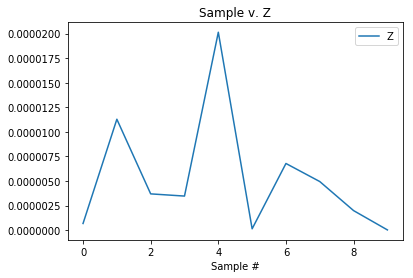